# EDA on Call Centre

**Problem Statement**

**RBS Board has hired services of Brent Associates to audit its accounts and the auditors have sought pay-out details to CallIn PLC. You are working with Brent Associates as data analyst and have been called in the team to render your services and investigate inconsistencies, if any. All information was tallied but the pay-outs given to CallIn PLC for the month of February 1999 were suspiciously incorrect and hence your major task is to audit this information and assess if payout has been accurately done and state exchequer has not been cheated upon.**

In [2]:
##Importing necessary libraries
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('february_data.csv')
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
0,AA0101,34536,0.0,0,PS,990201,07:02:47,07:02:56,00:00:00,00:00:00,AGENT,07:02:55,07:05:41,DORIT
1,AA0101,34537,0.0,0,PS,990201,07:31:45,07:31:55,00:00:00,00:00:00,AGENT,07:31:54,07:31:59,NO_SERVER
2,AA0101,34538,0.0,0,NW,990201,07:54:38,07:54:51,00:00:00,00:00:00,AGENT,07:54:49,07:56:21,TOVA
3,AA0101,34539,23317894.0,2,PS,990201,08:09:16,08:09:22,08:09:22,08:09:27,HANG,00:00:00,00:00:00,NO_SERVER
4,AA0101,34540,48178511.0,2,PS,990201,08:19:42,08:19:47,08:19:47,08:20:21,AGENT,08:20:20,08:22:04,MICHAL


In [13]:
df.tail()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
33339,AA0216,5607,0.0,0,IN,990226,14:14:43,14:15:05,00:00:00,00:00:00,HANG,00:00:00,00:00:00,NO_SERVER
33340,AA0216,5608,0.0,0,IN,990226,14:33:45,14:33:50,00:00:00,00:00:00,HANG,00:00:00,00:00:00,NO_SERVER
33341,AA0216,5609,0.0,0,IN,990228,11:29:39,11:29:48,11:29:48,11:33:39,HANG,00:00:00,00:00:00,NO_SERVER
33342,AA0216,5610,0.0,0,IN,990228,12:18:20,12:18:30,12:18:30,12:18:49,AGENT,12:18:48,12:22:54,YITZ
33343,AA0216,5611,0.0,0,IN,990228,16:01:22,16:01:32,16:01:32,16:09:25,HANG,00:00:00,00:00:00,NO_SERVER


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33344 entries, 0 to 33343
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vru+line     33344 non-null  object 
 1   call_id      33344 non-null  int64  
 2   customer_id  33344 non-null  float64
 3   priority     33344 non-null  int64  
 4   type         33344 non-null  object 
 5   date         33344 non-null  int64  
 6   vru_entry    33344 non-null  object 
 7   vru_exit     33344 non-null  object 
 8   q_start      33344 non-null  object 
 9   q_exit       33344 non-null  object 
 10  outcome      33344 non-null  object 
 11  ser_start    33344 non-null  object 
 12  ser_exit     33344 non-null  object 
 13  server       33344 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 3.6+ MB


In [15]:
##Checking for missing values if any
df.isna().sum()

vru+line       0
call_id        0
customer_id    0
priority       0
type           0
date           0
vru_entry      0
vru_exit       0
q_start        0
q_exit         0
outcome        0
ser_start      0
ser_exit       0
server         0
dtype: int64

In [16]:
df.describe()

,call_id,customer_id,priority,date
count,33344.000000,3.334400e+04,33344.000000,33344.000000
mean,27291.400372,3.139040e+08,0.685611,990213.579714
std,10127.469387,1.243254e+10,0.873233,8.035988
min,1410.000000,0.000000e+00,0.000000,990201.000000
25%,15107.750000,0.000000e+00,0.000000,990207.000000
50%,31510.500000,0.000000e+00,0.000000,990214.000000
75%,35330.250000,2.813175e+07,2.000000,990221.000000
max,37369.000000,7.240000e+11,2.000000,990228.000000


In [17]:
df.describe(include='object')

,vru+line,type,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server
count,33344,33344,33344,33344,33344,33344,33344,33344,33344,33344
unique,27,6,25234,25202,15297,15429,3,21918,21945,25
top,AA0101,PS,08:12:03,11:08:01,00:00:00,00:00:00,AGENT,00:00:00,00:00:00,NO_SERVER
freq,1668,21460,6,7,15008,15007,27162,5857,5857,6673


In [18]:
df["vru_entry"] = pd.to_datetime(df["vru_entry"])
df["vru_exit"] = pd.to_datetime(df["vru_exit"])


In [19]:
df['vru_total']=df['vru_exit']-df['vru_entry']
df['vru_total']

0       0 days 00:00:09
1       0 days 00:00:10
2       0 days 00:00:13
3       0 days 00:00:06
4       0 days 00:00:05
              ...      
33339   0 days 00:00:22
33340   0 days 00:00:05
33341   0 days 00:00:09
33342   0 days 00:00:10
33343   0 days 00:00:10
Name: vru_total, Length: 33344, dtype: timedelta64[ns]

In [20]:
df["q_start"] = pd.to_datetime(df["q_start"])
df["q_exit"] = pd.to_datetime(df["q_exit"])

In [21]:
df['q_total']=df['q_exit']-df['q_start']
df['q_total']

0       0 days 00:00:00
1       0 days 00:00:00
2       0 days 00:00:00
3       0 days 00:00:05
4       0 days 00:00:34
              ...      
33339   0 days 00:00:00
33340   0 days 00:00:00
33341   0 days 00:03:51
33342   0 days 00:00:19
33343   0 days 00:07:53
Name: q_total, Length: 33344, dtype: timedelta64[ns]

In [22]:
df["ser_start"] = pd.to_datetime(df["ser_start"])
df["ser_exit"] = pd.to_datetime(df["ser_exit"])

In [23]:
df['ser_total']=df['ser_exit']-df['ser_start']
df['ser_total']

0       0 days 00:02:46
1       0 days 00:00:05
2       0 days 00:01:32
3       0 days 00:00:00
4       0 days 00:01:44
              ...      
33339   0 days 00:00:00
33340   0 days 00:00:00
33341   0 days 00:00:00
33342   0 days 00:04:06
33343   0 days 00:00:00
Name: ser_total, Length: 33344, dtype: timedelta64[ns]

In [24]:
from datetime import datetime

df['vru_total'] = df['vru_total'].dt.seconds


In [25]:
df['vru_total']

0         9
1        10
2        13
3         6
4         5
         ..
33339    22
33340     5
33341     9
33342    10
33343    10
Name: vru_total, Length: 33344, dtype: int64

In [26]:
df['ser_total'] = df['ser_total'].dt.seconds

In [27]:
df['ser_total'] 

0        166
1          5
2         92
3          0
4        104
        ... 
33339      0
33340      0
33341      0
33342    246
33343      0
Name: ser_total, Length: 33344, dtype: int64

In [28]:
df['q_total'] = df['q_total'].dt.seconds

In [29]:
df['q_total']=df['q_total']/60
df['q_total']

0        0.000000
1        0.000000
2        0.000000
3        0.083333
4        0.566667
           ...   
33339    0.000000
33340    0.000000
33341    3.850000
33342    0.316667
33343    7.883333
Name: q_total, Length: 33344, dtype: float64

In [30]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total
0,AA0101,34536,0.0,0,PS,990201,2023-05-11 07:02:47,2023-05-11 07:02:56,2023-05-11 00:00:00,2023-05-11 00:00:00,AGENT,2023-05-11 07:02:55,2023-05-11 07:05:41,DORIT,9,0.000000,166
1,AA0101,34537,0.0,0,PS,990201,2023-05-11 07:31:45,2023-05-11 07:31:55,2023-05-11 00:00:00,2023-05-11 00:00:00,AGENT,2023-05-11 07:31:54,2023-05-11 07:31:59,NO_SERVER,10,0.000000,5
2,AA0101,34538,0.0,0,NW,990201,2023-05-11 07:54:38,2023-05-11 07:54:51,2023-05-11 00:00:00,2023-05-11 00:00:00,AGENT,2023-05-11 07:54:49,2023-05-11 07:56:21,TOVA,13,0.000000,92
3,AA0101,34539,23317894.0,2,PS,990201,2023-05-11 08:09:16,2023-05-11 08:09:22,2023-05-11 08:09:22,2023-05-11 08:09:27,HANG,2023-05-11 00:00:00,2023-05-11 00:00:00,NO_SERVER,6,0.083333,0
4,AA0101,34540,48178511.0,2,PS,990201,2023-05-11 08:19:42,2023-05-11 08:19:47,2023-05-11 08:19:47,2023-05-11 08:20:21,AGENT,2023-05-11 08:20:20,2023-05-11 08:22:04,MICHAL,5,0.566667,104


In [31]:
df['q_total'].value_counts()

0.000000    15038
0.150000      310
0.200000      290
0.166667      286
0.250000      272
            ...  
6.600000        1
6.966667        1
6.083333        1
5.883333        1
7.883333        1
Name: q_total, Length: 470, dtype: int64

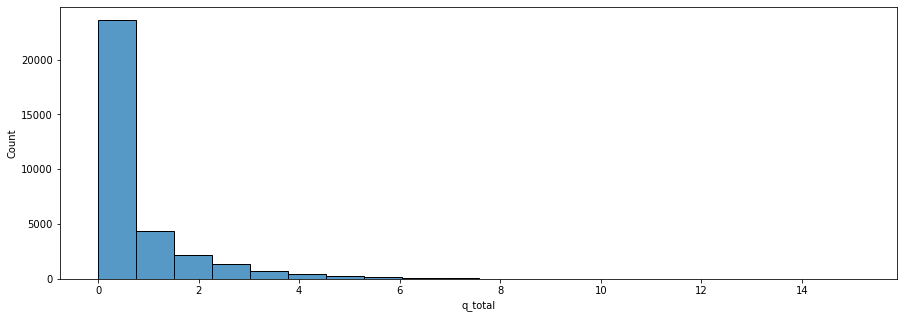

In [32]:
fig,axes = plt.subplots(figsize=(15,5))
sns.histplot(df.q_total,bins=20)
plt.show()

In [33]:
df['vru_total'].value_counts()

6        7520
5        5212
9        5111
10       3952
11       1549
         ... 
86344       1
279         1
55          1
110         1
127         1
Name: vru_total, Length: 209, dtype: int64

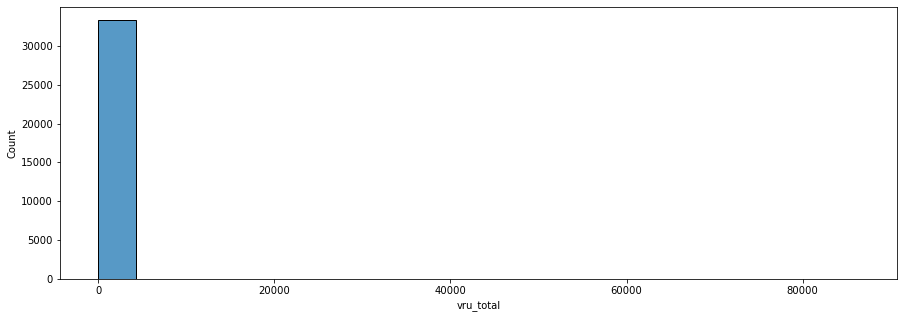

In [34]:
fig,axes = plt.subplots(figsize=(15,5))
sns.histplot(df.vru_total,bins=20)
plt.show()

In [35]:
df['ser_total'].value_counts()

0       5893
3        354
4        324
5        231
2        229
        ... 
1055       1
978        1
1771       1
888        1
1312       1
Name: ser_total, Length: 1211, dtype: int64

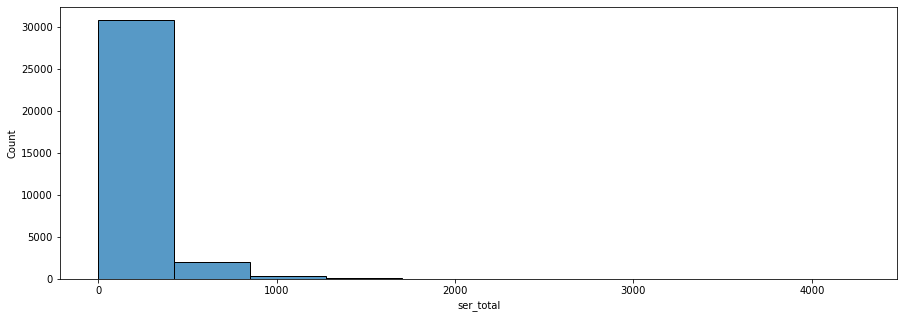

In [36]:
fig,axes = plt.subplots(figsize=(15,5))
sns.histplot(df.ser_total,bins=10)
plt.show()

In [37]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total
0,AA0101,34536,0.0,0,PS,990201,2023-05-11 07:02:47,2023-05-11 07:02:56,2023-05-11 00:00:00,2023-05-11 00:00:00,AGENT,2023-05-11 07:02:55,2023-05-11 07:05:41,DORIT,9,0.000000,166
1,AA0101,34537,0.0,0,PS,990201,2023-05-11 07:31:45,2023-05-11 07:31:55,2023-05-11 00:00:00,2023-05-11 00:00:00,AGENT,2023-05-11 07:31:54,2023-05-11 07:31:59,NO_SERVER,10,0.000000,5
2,AA0101,34538,0.0,0,NW,990201,2023-05-11 07:54:38,2023-05-11 07:54:51,2023-05-11 00:00:00,2023-05-11 00:00:00,AGENT,2023-05-11 07:54:49,2023-05-11 07:56:21,TOVA,13,0.000000,92
3,AA0101,34539,23317894.0,2,PS,990201,2023-05-11 08:09:16,2023-05-11 08:09:22,2023-05-11 08:09:22,2023-05-11 08:09:27,HANG,2023-05-11 00:00:00,2023-05-11 00:00:00,NO_SERVER,6,0.083333,0
4,AA0101,34540,48178511.0,2,PS,990201,2023-05-11 08:19:42,2023-05-11 08:19:47,2023-05-11 08:19:47,2023-05-11 08:20:21,AGENT,2023-05-11 08:20:20,2023-05-11 08:22:04,MICHAL,5,0.566667,104


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33344 entries, 0 to 33343
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   vru+line     33344 non-null  object        
 1   call_id      33344 non-null  int64         
 2   customer_id  33344 non-null  float64       
 3   priority     33344 non-null  int64         
 4   type         33344 non-null  object        
 5   date         33344 non-null  int64         
 6   vru_entry    33344 non-null  datetime64[ns]
 7   vru_exit     33344 non-null  datetime64[ns]
 8   q_start      33344 non-null  datetime64[ns]
 9   q_exit       33344 non-null  datetime64[ns]
 10  outcome      33344 non-null  object        
 11  ser_start    33344 non-null  datetime64[ns]
 12  ser_exit     33344 non-null  datetime64[ns]
 13  server       33344 non-null  object        
 14  vru_total    33344 non-null  int64         
 15  q_total      33344 non-null  float64       
 16  ser_

In [72]:
total_fixed_billing = df['vru_total'] + df['q_total'] + df['ser_total']
total_fixed_billing_sum = total_fixed_billing.sum()
total_fixed_billing_sum

7345148.983333333

### VRU Call charges: 

In [83]:
import math

v = df['vru_total'].sum()
v_net = v - 120000

if v_net > 0:
    v_net *= 0.5
    print("VRU Call charges:", v_net)
else:
    print('error')



VRU Call charges: 1194453.5


### Service Time Charges: 

In [81]:
z = df['ser_total'].sum()
print("Total Service Time:", z)

z_net = 3000000 - z
print("Remaining Service Time:", z_net)

z_net1 = 0

if z_net < 0:
    z_net = abs(z_net) + 1500000
    print("Service Time Charges:", z_net)
elif z_net > 0:
    z_net = z_net * 0.5
    print("Service Time Charges:", z_net)
    
    


Total Service Time: 4813017
Remaining Service Time: -1813017
Service Time Charges: 3313017


In [30]:
df.server.value_counts()

NO_SERVER    6673
IDIT         1957
YIFAT        1904
YITZ         1794
AVNI         1739
KAZAV        1697
TOVA         1682
SHARON       1678
MIKI         1293
MORIAH       1226
ANAT         1219
BASCH        1169
ZOHARI       1146
BENSION      1136
MICHAL       1121
DORIT        1050
STEREN       1049
AVIDAN        881
GILI          614
SHLOMO        604
DARMON        516
ELI           509
NAAMA         504
GELBER        143
PINHAS         40
Name: server, dtype: int64

In [31]:
df.server.nunique()

25

In [32]:
dff = df[df.server == 'NO_SERVER']
dff.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total
1,AA0101,34537,0.0,0,PS,990201,2023-05-09 07:31:45,2023-05-09 07:31:55,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:31:54,2023-05-09 07:31:59,NO_SERVER,10,0.000000,5
3,AA0101,34539,23317894.0,2,PS,990201,2023-05-09 08:09:16,2023-05-09 08:09:22,2023-05-09 08:09:22,2023-05-09 08:09:27,HANG,2023-05-09 00:00:00,2023-05-09 00:00:00,NO_SERVER,6,0.083333,0
14,AA0101,34550,27849181.0,1,PS,990201,2023-05-09 09:57:59,2023-05-09 09:58:05,2023-05-09 09:58:05,2023-05-09 09:58:13,HANG,2023-05-09 00:00:00,2023-05-09 00:00:00,NO_SERVER,6,0.133333,0
16,AA0101,34552,28481158.0,2,PS,990201,2023-05-09 10:16:08,2023-05-09 10:16:14,2023-05-09 10:16:14,2023-05-09 10:16:32,HANG,2023-05-09 00:00:00,2023-05-09 00:00:00,NO_SERVER,6,0.300000,0
23,AA0101,34559,0.0,0,NW,990201,2023-05-09 11:28:18,2023-05-09 11:28:28,2023-05-09 11:28:28,2023-05-09 11:28:32,HANG,2023-05-09 00:00:00,2023-05-09 00:00:00,NO_SERVER,10,0.066667,0


In [33]:
dff = df[df.server == 'NO_SERVER'].index
dff

Int64Index([    1,     3,    14,    16,    23,    26,    36,    40,    46,
               49,
            ...
            33331, 33332, 33333, 33334, 33335, 33336, 33339, 33340, 33341,
            33343],
           dtype='int64', length=6673)

**How many calls for internet consulting were hung up by customer despite the availability of a server:**

In [42]:
dff = df.loc[(df.server != 'NO_SERVER') & (df.type=='IN') & (df.outcome=='HANG')]
dff

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total


**How many Phantom Calls were assigned to the agents?**


In [35]:
dff = df.loc[(df.server != 'NO_SERVER') & (df.outcome=='PHANTOM')]
dff

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total


**Which agent has the highest average service time**

In [36]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total
0,AA0101,34536,0.0,0,PS,990201,2023-05-09 07:02:47,2023-05-09 07:02:56,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:02:55,2023-05-09 07:05:41,DORIT,9,0.000000,166
1,AA0101,34537,0.0,0,PS,990201,2023-05-09 07:31:45,2023-05-09 07:31:55,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:31:54,2023-05-09 07:31:59,NO_SERVER,10,0.000000,5
2,AA0101,34538,0.0,0,NW,990201,2023-05-09 07:54:38,2023-05-09 07:54:51,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:54:49,2023-05-09 07:56:21,TOVA,13,0.000000,92
3,AA0101,34539,23317894.0,2,PS,990201,2023-05-09 08:09:16,2023-05-09 08:09:22,2023-05-09 08:09:22,2023-05-09 08:09:27,HANG,2023-05-09 00:00:00,2023-05-09 00:00:00,NO_SERVER,6,0.083333,0
4,AA0101,34540,48178511.0,2,PS,990201,2023-05-09 08:19:42,2023-05-09 08:19:47,2023-05-09 08:19:47,2023-05-09 08:20:21,AGENT,2023-05-09 08:20:20,2023-05-09 08:22:04,MICHAL,5,0.566667,104


In [37]:
dff=df.groupby('server').mean('ser_total')
dff

,call_id,customer_id,priority,date,vru_total,q_total,ser_total
server,,,,,,,
ANAT,25729.547170,5.133744e+08,0.739130,990209.674323,9.267432,0.490730,150.776046
AVIDAN,27771.322361,7.038128e+08,0.897843,990216.947787,106.442679,0.671529,247.701476
AVNI,27499.390454,1.997859e+07,0.711328,990213.368603,8.626222,0.778330,256.491662
BASCH,26831.497861,6.366120e+08,0.650984,990211.520958,8.884517,0.669846,148.266039
BENSION,27869.169014,2.990893e+08,0.459507,990213.607394,87.853873,0.549237,139.924296
DARMON,26720.203488,2.715028e+07,1.001938,990211.149225,175.695736,0.939018,249.451550
DORIT,27349.409524,1.173726e+09,0.741905,990213.200000,90.293333,0.604635,198.186667
ELI,28786.223969,1.388670e+07,0.732809,990213.512770,9.412574,0.633137,393.249509
GELBER,26861.727273,2.920947e+07,0.979021,990213.776224,610.958042,1.080653,145.587413


In [38]:
sorted_df = dff.sort_values(by=['ser_total'], ascending=False)
sorted_df.head(1)

,call_id,customer_id,priority,date,vru_total,q_total,ser_total
server,,,,,,,
PINHAS,23587.85,28748415.05,1.225,990208.45,5.85,0.995,682.925


**Which agent has the least number of calls assigned?**

In [39]:
dff = df.loc[(df.server != 'NO_SERVER') & (df.outcome=='AGENT')]
dff.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total
0,AA0101,34536,0.0,0,PS,990201,2023-05-09 07:02:47,2023-05-09 07:02:56,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:02:55,2023-05-09 07:05:41,DORIT,9,0.000000,166
2,AA0101,34538,0.0,0,NW,990201,2023-05-09 07:54:38,2023-05-09 07:54:51,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:54:49,2023-05-09 07:56:21,TOVA,13,0.000000,92
4,AA0101,34540,48178511.0,2,PS,990201,2023-05-09 08:19:42,2023-05-09 08:19:47,2023-05-09 08:19:47,2023-05-09 08:20:21,AGENT,2023-05-09 08:20:20,2023-05-09 08:22:04,MICHAL,5,0.566667,104
5,AA0101,34541,64852437.0,2,PS,990201,2023-05-09 08:29:06,2023-05-09 08:29:12,2023-05-09 08:29:12,2023-05-09 08:30:20,AGENT,2023-05-09 08:30:19,2023-05-09 08:35:13,KAZAV,6,1.133333,294
6,AA0101,34542,0.0,0,PS,990201,2023-05-09 08:39:42,2023-05-09 08:39:53,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 08:39:52,2023-05-09 08:42:20,KAZAV,11,0.000000,148


In [40]:
df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,q_start,q_exit,outcome,ser_start,ser_exit,server,vru_total,q_total,ser_total
0,AA0101,34536,0.0,0,PS,990201,2023-05-09 07:02:47,2023-05-09 07:02:56,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:02:55,2023-05-09 07:05:41,DORIT,9,0.000000,166
1,AA0101,34537,0.0,0,PS,990201,2023-05-09 07:31:45,2023-05-09 07:31:55,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:31:54,2023-05-09 07:31:59,NO_SERVER,10,0.000000,5
2,AA0101,34538,0.0,0,NW,990201,2023-05-09 07:54:38,2023-05-09 07:54:51,2023-05-09 00:00:00,2023-05-09 00:00:00,AGENT,2023-05-09 07:54:49,2023-05-09 07:56:21,TOVA,13,0.000000,92
3,AA0101,34539,23317894.0,2,PS,990201,2023-05-09 08:09:16,2023-05-09 08:09:22,2023-05-09 08:09:22,2023-05-09 08:09:27,HANG,2023-05-09 00:00:00,2023-05-09 00:00:00,NO_SERVER,6,0.083333,0
4,AA0101,34540,48178511.0,2,PS,990201,2023-05-09 08:19:42,2023-05-09 08:19:47,2023-05-09 08:19:47,2023-05-09 08:20:21,AGENT,2023-05-09 08:20:20,2023-05-09 08:22:04,MICHAL,5,0.566667,104


In [41]:
df['server'].value_counts()

NO_SERVER    6673
IDIT         1957
YIFAT        1904
YITZ         1794
AVNI         1739
KAZAV        1697
TOVA         1682
SHARON       1678
MIKI         1293
MORIAH       1226
ANAT         1219
BASCH        1169
ZOHARI       1146
BENSION      1136
MICHAL       1121
DORIT        1050
STEREN       1049
AVIDAN        881
GILI          614
SHLOMO        604
DARMON        516
ELI           509
NAAMA         504
GELBER        143
PINHAS         40
Name: server, dtype: int64

**Which agent’s customers had to wait for the longest in order to speak to the agent?**

In [42]:
df.groupby('server')['q_total'].max().sort_values(ascending=False)

server
NO_SERVER    15.133333
ELI          12.483333
YIFAT        11.266667
AVNI         10.850000
MICHAL       10.300000
KAZAV        10.133333
SHARON        9.850000
BASCH         9.733333
STEREN        9.500000
BENSION       9.266667
IDIT          9.183333
GELBER        8.716667
DARMON        8.583333
ZOHARI        7.950000
DORIT         7.800000
SHLOMO        7.600000
MIKI          7.583333
YITZ          7.583333
MORIAH        7.550000
TOVA          7.300000
ANAT          7.066667
NAAMA         6.483333
AVIDAN        6.466667
GILI          5.250000
PINHAS        3.716667
Name: q_total, dtype: float64

In [43]:
df.q_total.max()

15.133333333333333

In [44]:
(df.loc[df.outcome=='AGENT']).groupby('server')['q_total'].max().sort_values(ascending=False)

server
ELI          12.483333
YIFAT        11.266667
AVNI         10.850000
MICHAL       10.300000
KAZAV        10.133333
SHARON        9.850000
BASCH         9.733333
STEREN        9.500000
BENSION       9.266667
IDIT          9.183333
GELBER        8.716667
DARMON        8.583333
ZOHARI        7.950000
DORIT         7.800000
SHLOMO        7.600000
MIKI          7.583333
YITZ          7.583333
MORIAH        7.550000
TOVA          7.300000
ANAT          7.066667
NAAMA         6.483333
AVIDAN        6.466667
GILI          5.250000
PINHAS        3.716667
NO_SERVER     2.550000
Name: q_total, dtype: float64

**Based on description of data, queuing time of Phantom calls should be the highest. Is this assumption correct?**


In [45]:
df.groupby('outcome')['q_total'].mean().sort_values(ascending=False)

outcome
PHANTOM    1.576259
HANG       0.733105
AGENT      0.679572
Name: q_total, dtype: float64

**Which of the following customers has made maximum number of calls (Chose customer ID)?**

In [46]:
df.groupby('customer_id')['call_id'].count().sort_values(ascending=False)

customer_id
0.000000e+00    19558
5.870461e+07      170
7.191646e+06      170
6.968728e+07      126
5.286774e+07      117
                ...  
2.883200e+07        1
2.885403e+07        1
2.886817e+07        1
2.889256e+07        1
7.240000e+11        1
Name: call_id, Length: 4081, dtype: int64

**Calls from which of the following customers have been tagged as Phantom calls most number of times (Chose customer ID)?**


In [47]:
(df.loc[df.outcome=='PHANTOM']).groupby('customer_id')['call_id'].count().sort_values(ascending=False)

customer_id
0.0            56
13408620.0      3
28994457.0      2
25627027.0      2
58466244.0      2
               ..
25159740.0      1
25245705.0      1
25291774.0      1
25310970.0      1
962908463.0     1
Name: call_id, Length: 210, dtype: int64

**What percentage of high priority customer calls have been hung?**


In [48]:
df.loc[(df.priority==2) & (df.outcome=='HANG')].groupby('priority')['call_id'].count()/df['call_id'].count()*100

priority
2    2.726128
Name: call_id, dtype: float64